Начальное состояние: Работа
Возможные состояния:
Работа -> Отдых -> Спорт -> Еда
Результаты моделирования:
Шаг 0: 1.0000, 0.0000, 0.0000, 0.0000
Шаг 1: 0.1000, 0.4000, 0.3000, 0.2000
Шаг 2: 0.2500, 0.3500, 0.2700, 0.1300
Шаг 3: 0.2230, 0.3600, 0.2790, 0.1380
Шаг 4: 0.2275, 0.3583, 0.2781, 0.1361
Шаг 5: 0.2267, 0.3586, 0.2784, 0.1364
Шаг 6: 0.2268, 0.3585, 0.2783, 0.1363
Шаг 7: 0.2268, 0.3585, 0.2784, 0.1363
Шаг 8: 0.2268, 0.3585, 0.2784, 0.1363
Шаг 9: 0.2268, 0.3585, 0.2784, 0.1363
Конечное состояние через 9 шагов: Отдых
Последовательность вероятностей на последнем шаге: [0.22680402 0.35853383 0.27835053 0.13631161]
--------------------------------------------------
Начальное состояние: Отдых
Возможные состояния:
Работа -> Отдых -> Спорт -> Еда
Результаты моделирования:
Шаг 0: 0.0000, 1.0000, 0.0000, 0.0000
Шаг 1: 0.3000, 0.4000, 0.2000, 0.1000
Шаг 2: 0.2200, 0.3700, 0.2700, 0.1400
Шаг 3: 0.2290, 0.3590, 0.2760, 0.1360
Шаг 4: 0.2266, 0.3588, 0.2781, 0.1365
Шаг 5: 0.2269, 0.3585, 0.2783

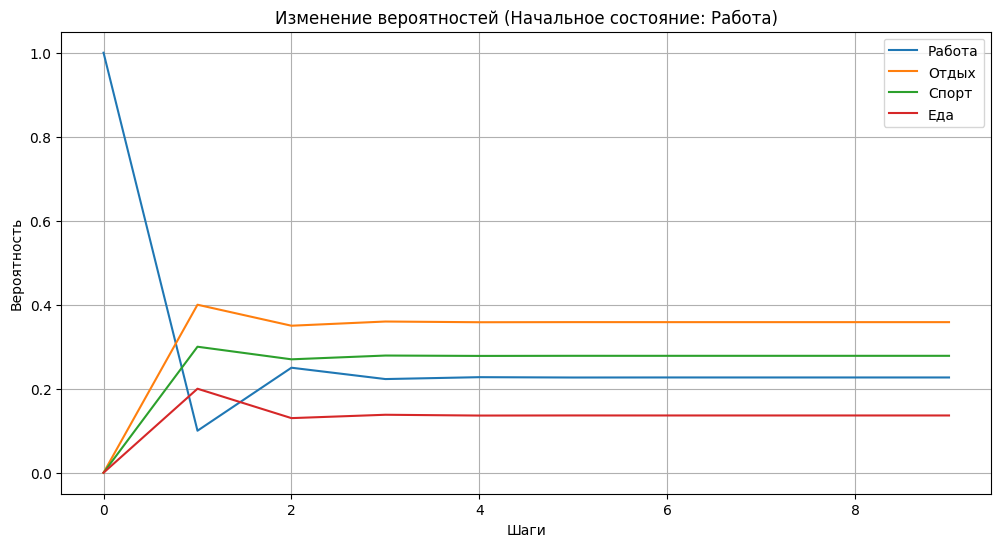

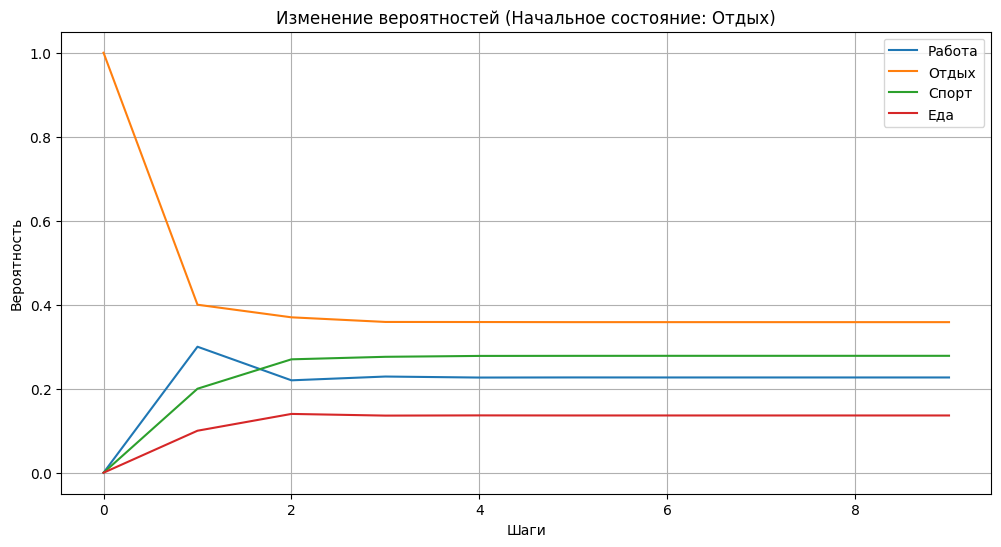

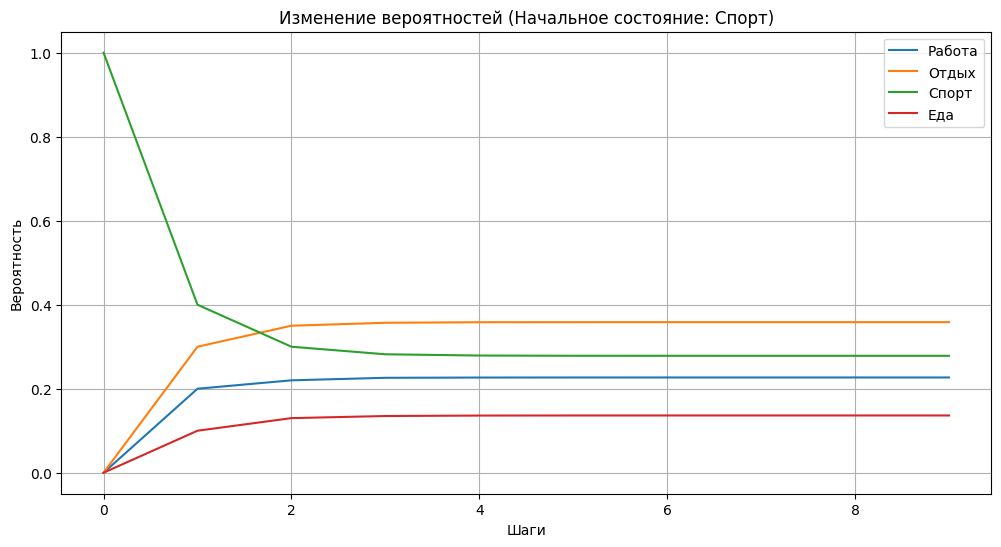

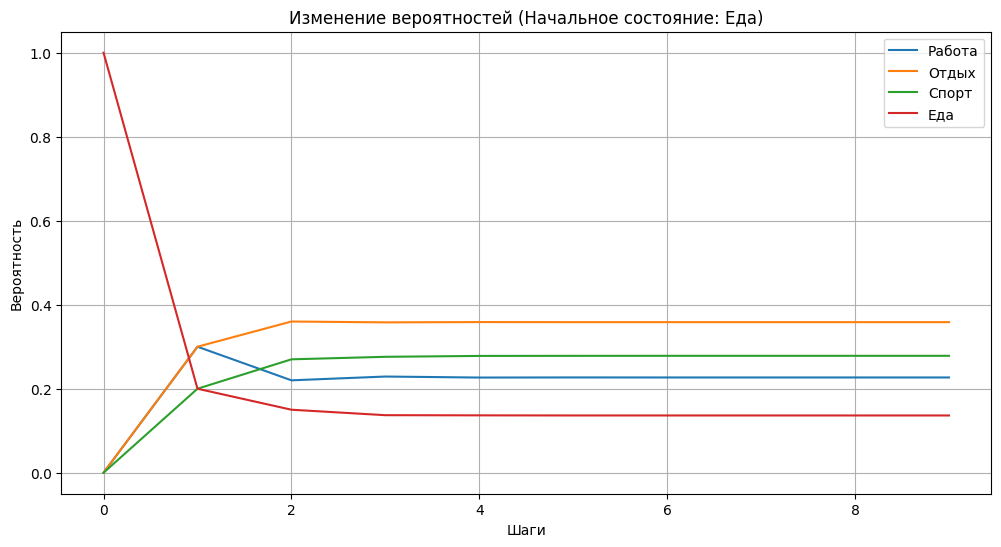

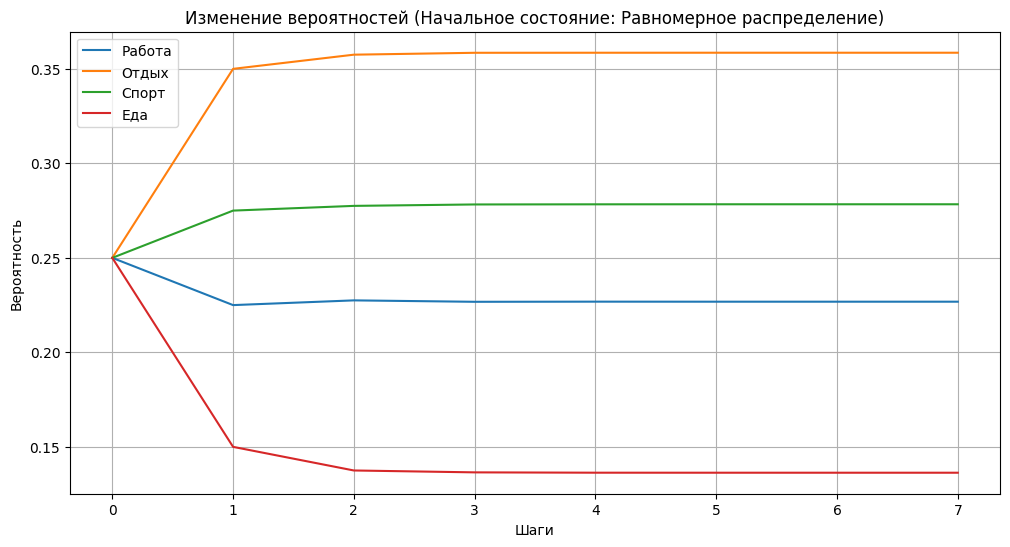

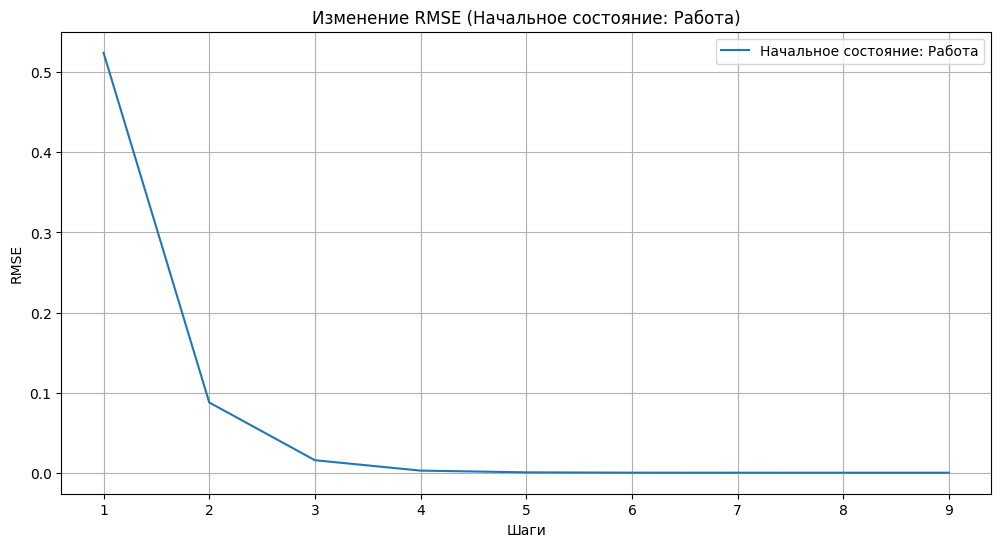

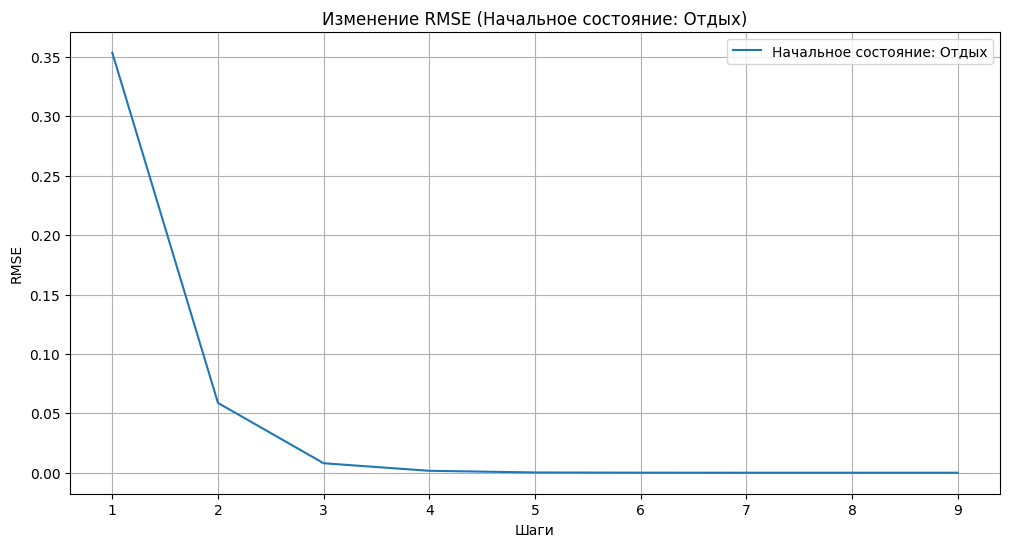

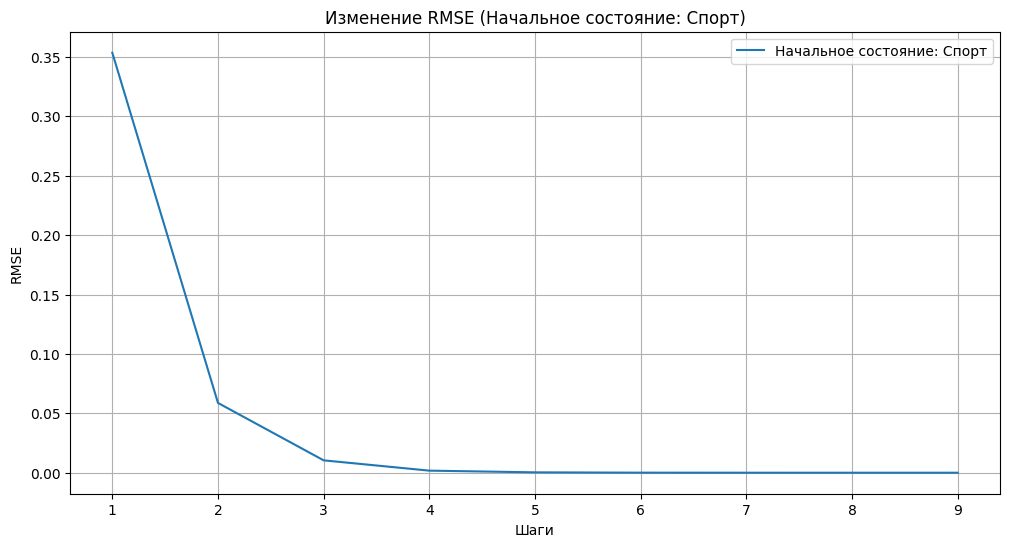

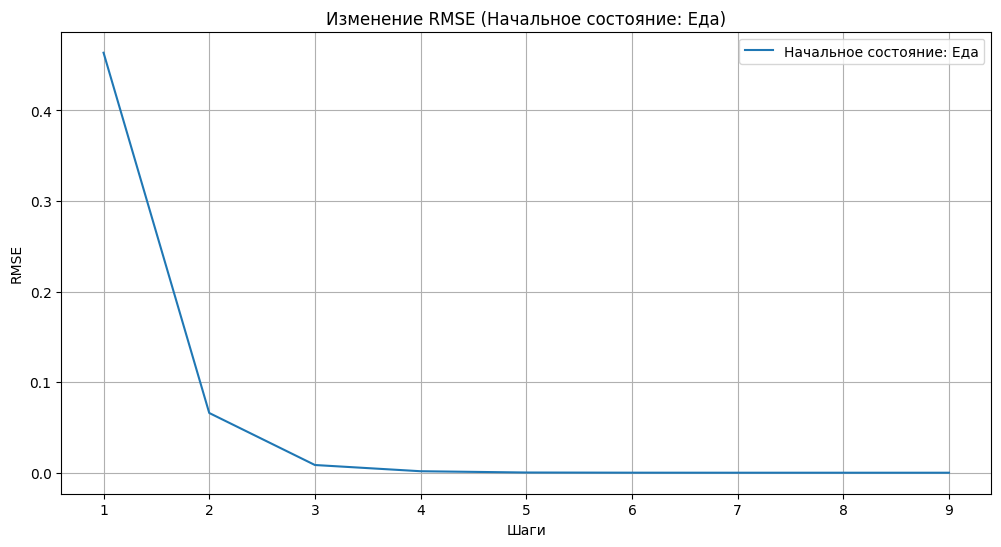

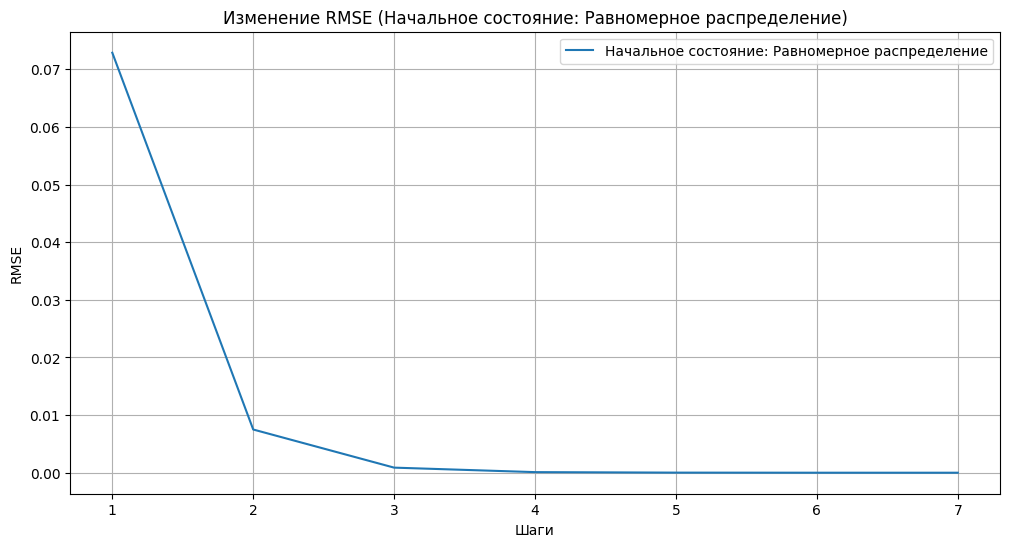

Стационарное распределение: [0.22680412 0.35853379 0.27835052 0.13631157]
Сумма элементов: 1.0
Начальное состояние: Работа
Финальное распределение: [0.22680402 0.35853383 0.27835053 0.13631161]
Стационарное распределение: [0.22680412 0.35853379 0.27835052 0.13631157]
Абсолютная разница: [1.02711340e-07 4.24765178e-08 1.75360825e-08 4.26987401e-08]

Начальное состояние: Отдых
Финальное распределение: [0.22680418 0.35853379 0.27835045 0.13631157]
Стационарное распределение: [0.22680412 0.35853379 0.27835052 0.13631157]
Абсолютная разница: [5.92886598e-08 2.47651777e-09 6.34639176e-08 1.69874007e-09]

Начальное состояние: Спорт
Финальное распределение: [0.2268041  0.35853375 0.27835061 0.13631153]
Стационарное распределение: [0.22680412 0.35853379 0.27835052 0.13631157]
Абсолютная разница: [2.17113401e-08 3.85234822e-08 9.85360825e-08 3.83012599e-08]

Начальное состояние: Еда
Финальное распределение: [0.22680418 0.35853379 0.27835045 0.13631157]
Стационарное распределение: [0.22680412 0.3

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Пространство состояний
states = ["Работа", "Отдых", "Спорт", "Еда"]

# Матрица переходов
trans_matrix = np.array([
    [0.1, 0.4, 0.3, 0.2],  # Работа ->
    [0.3, 0.4, 0.2, 0.1],  # Отдых ->
    [0.2, 0.3, 0.4, 0.1],  # Спорт ->
    [0.3, 0.3, 0.2, 0.2]   # Еда ->
])

# Начальные вектора вероятностей
init_prob_vectors = [
    np.array([1.0, 0.0, 0.0, 0.0]),  # Начало в "Работа"
    np.array([0.0, 1.0, 0.0, 0.0]),  # Начало в "Отдых"
    np.array([0.0, 0.0, 1.0, 0.0]),  # Начало в "Спорт"
    np.array([0.0, 0.0, 0.0, 1.0]),  # Начало в "Еда"
    np.array([0.25, 0.25, 0.25, 0.25])  # Равномерное распределение
]

def markov_step(state_prob, trans_matrix):
    return state_prob @ trans_matrix

def simulate_chain(init_prob, trans_matrix, steps, epsilon=1e-6):
    current_prob = init_prob
    history = [current_prob]
    for _ in range(steps):
        next_prob = markov_step(current_prob, trans_matrix)
        history.append(next_prob)
        if np.linalg.norm(next_prob - current_prob) < epsilon:
            break
        current_prob = next_prob
    return history

# Моделирование
steps = 50
chains = [simulate_chain(vec, trans_matrix, steps) for vec in init_prob_vectors]

# Вывод результатов
for i, chain in enumerate(chains):
    init_state = states[i] if i < len(states) else 'Равномерное распределение'
    print(f"Начальное состояние: {init_state}")
    print(f"Возможные состояния:\n{' -> '.join(states)}")
    print("Результаты моделирования:")
    for step, vec in enumerate(chain):
        print(f"Шаг {step}: {', '.join([f'{p:.4f}' for p in vec])}")
    final_state = states[np.argmax(chain[-1])]
    print(f"Конечное состояние через {len(chain) - 1} шагов: {final_state}")
    print(f"Последовательность вероятностей на последнем шаге: {chain[-1]}")
    print("-" * 50)

def plot_chains(chains, states, init_states):
    for i, chain in enumerate(chains):
        chain = np.array(chain)
        plt.figure(figsize=(12, 6))
        for j, state in enumerate(states):
            plt.plot(range(len(chain)), chain[:, j], label=state)
        plt.title(f'Изменение вероятностей (Начальное состояние: {init_states[i]})')
        plt.xlabel('Шаги')
        plt.ylabel('Вероятность')
        plt.legend()
        plt.grid(True)
        plt.show()

def plot_rmse(chains, init_states):
    for i, chain in enumerate(chains):
        rmse = []
        for j in range(1, len(chain)):
            rmse.append(np.sqrt(np.mean((chain[j] - chain[j - 1]) ** 2)))
        plt.figure(figsize=(12, 6))
        plt.plot(range(1, len(chain)), rmse, label=f'Начальное состояние: {init_states[i]}')
        plt.title(f'Изменение RMSE (Начальное состояние: {init_states[i]})')
        plt.xlabel('Шаги')
        plt.ylabel('RMSE')
        plt.legend()
        plt.grid(True)
        plt.show()

# Использование визуализации
init_states = ["Работа", "Отдых", "Спорт", "Еда", "Равномерное распределение"]
plot_chains(chains, states, init_states)
plot_rmse(chains, init_states)

# Аналитическое стационарное распределение
def find_stationary_distribution(transition_matrix):
    n = len(transition_matrix)
    A = np.transpose(transition_matrix) - np.eye(n)
    A = np.vstack([A, np.ones(n)])
    b = np.zeros(n + 1)
    b[-1] = 1
    pi, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)
    return pi

stationary_distribution = find_stationary_distribution(trans_matrix)
print("Стационарное распределение:", stationary_distribution)
print("Сумма элементов:", np.sum(stationary_distribution))

# Сравнение
def compare_distributions(chains, stationary_dist, init_states):
    for i, chain in enumerate(chains):
        final_dist = chain[-1]
        print(f"Начальное состояние: {init_states[i]}")
        print(f"Финальное распределение: {final_dist}")
        print(f"Стационарное распределение: {stationary_dist}")
        print(f"Абсолютная разница: {np.abs(final_dist - stationary_dist)}\n")

compare_distributions(chains, stationary_distribution, init_states)
